In [1]:
import os
import random
from PIL import Image, ImageDraw, ImageFont

# Create dataset structure
dataset_path = "./OCR_Dataset/"
images_path = os.path.join(dataset_path, "images")
os.makedirs(images_path, exist_ok=True)

# Sample words for dataset (200 common words)
sample_words = [
    "Hello", "World", "Python", "OCR", "Dataset", "Text", "Vision", "Model", "AI", "Future",
    "Computer", "Science", "Machine", "Learning", "Deep", "Neural", "Network", "Recognition", "Algorithm", "Data",
    "Cloud", "Storage", "GPU", "Memory", "Process", "Technology", "Software", "Hardware", "Information", "Security",
    "Mobile", "Device", "Phone", "Tablet", "Laptop", "Monitor", "Keyboard", "Mouse", "Camera", "Internet",
    "Browser", "Website", "Online", "Network", "Server", "Database", "Search", "Query", "Engine", "Application",
    "Coding", "Programming", "Script", "Command", "Interface", "Console", "Terminal", "Shell", "Syntax", "Compiler",
    "Debugger", "Editor", "Development", "Framework", "Library", "Package", "Module", "Function", "Variable", "Constant",
    "Parameter", "Return", "Execute", "Runtime", "Exception", "Error", "Warning", "Log", "Output", "Input",
    "Processing", "Performance", "Optimization", "Benchmark", "Latency", "Throughput", "Efficiency", "Parallel", "Thread", "Process",
    "Storage", "Disk", "Drive", "Cache", "Buffer", "Memory", "RAM", "ROM", "SSD", "HDD",
    "USB", "Bluetooth", "Wireless", "Signal", "Frequency", "Bandwidth", "Latency", "Protocol", "Encryption", "Decryption",
    "Authentication", "Authorization", "Access", "Firewall", "Antivirus", "Malware", "Phishing", "Hacking", "Cyber", "Attack",
    "Password", "Token", "Blockchain", "Crypto", "Bitcoin", "Ethereum", "Smart", "Contract", "Mining", "Wallet",
    "Stock", "Market", "Trading", "Finance", "Economy", "Investment", "Banking", "Credit", "Loan", "Mortgage",
    "Education", "Learning", "Student", "Teacher", "Course", "Subject", "Classroom", "Lecture", "Homework", "Exam",
    "Travel", "Tourism", "Vacation", "Destination", "Ticket", "Hotel", "Flight", "Airport", "Journey", "Trip",
    "Food", "Restaurant", "Menu", "Chef", "Recipe", "Cooking", "Baking", "Dining", "Nutrition", "Health",
    "Weather", "Climate", "Temperature", "Forecast", "Sunshine", "Rain", "Storm", "Snow", "Cloud", "Wind",
    "Sports", "Football", "Basketball", "Tennis", "Cricket", "Baseball", "Athlete", "Coach", "Team", "Goal"
]

# Font settings (adjust if needed)
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Default font
image_size = (250, 80)  # Image dimensions (width, height)

# Shuffle words to get random selection
random.shuffle(sample_words)
ground_truth_texts = sample_words[:200]  # Select first 200 shuffled words

# Generate images with text
for i, word in enumerate(ground_truth_texts, 1):
    img = Image.new("RGB", image_size, (255, 255, 255))  # White background
    draw = ImageDraw.Draw(img)

    try:
        font = ImageFont.truetype(font_path, random.randint(25, 40))  # Random font size
    except:
        font = ImageFont.load_default()

    text_size = draw.textbbox((0, 0), word, font=font)
    text_width = text_size[2] - text_size[0]
    text_height = text_size[3] - text_size[1]

    text_x = (image_size[0] - text_width) // 2
    text_y = (image_size[1] - text_height) // 2

    draw.text((text_x, text_y), word, font=font, fill=(0, 0, 0))  # Black text

    img.save(os.path.join(images_path, f"{i}.png"))

# Save ground truth text file
text_file_path = os.path.join(dataset_path, "text.txt")
with open(text_file_path, "w") as f:
    for word in ground_truth_texts:
        f.write(word + "\n")

# Verify dataset creation
print("✅ Dataset with 200 images created successfully!")
print(f"📂 Images saved in: {images_path}")
print(f"📄 Text file saved at: {text_file_path}")


✅ Dataset with 200 images created successfully!
📂 Images saved in: ./OCR_Dataset/images
📄 Text file saved at: ./OCR_Dataset/text.txt


🔹 Image: 1.png | OCR: Drive | GT: Drive
🔹 Image: 2.png | OCR: Latency | GT: Latency
🔹 Image: 3.png | OCR: Text | GT: Text
🔹 Image: 4.png | OCR: Signal | GT: Signal
🔹 Image: 5.png | OCR: Market | GT: Market

🔹 Final Performance Metrics:
✅ Average WER: 0.3368
✅ Average CER: 0.0984
✅ Average Levenshtein Distance: 0.4895
✅ Average Processing Time: 0.1260 sec


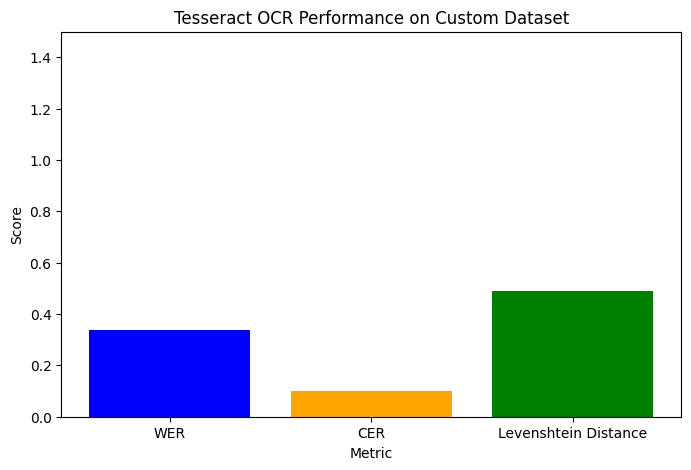

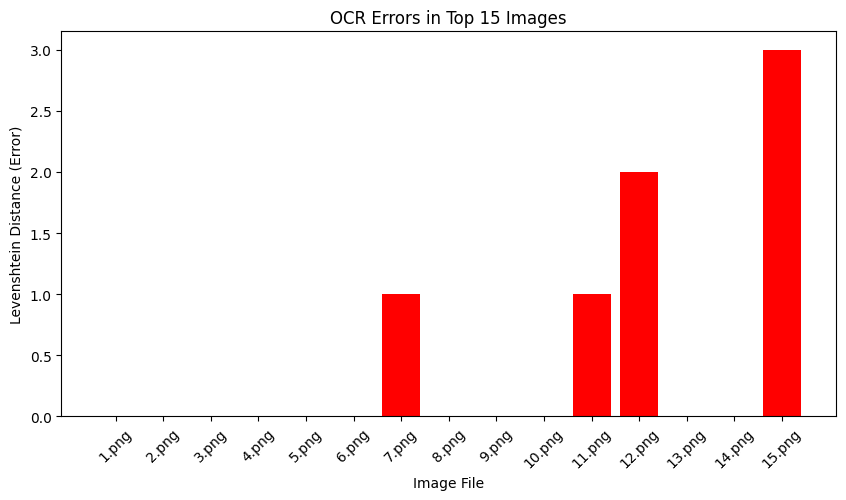

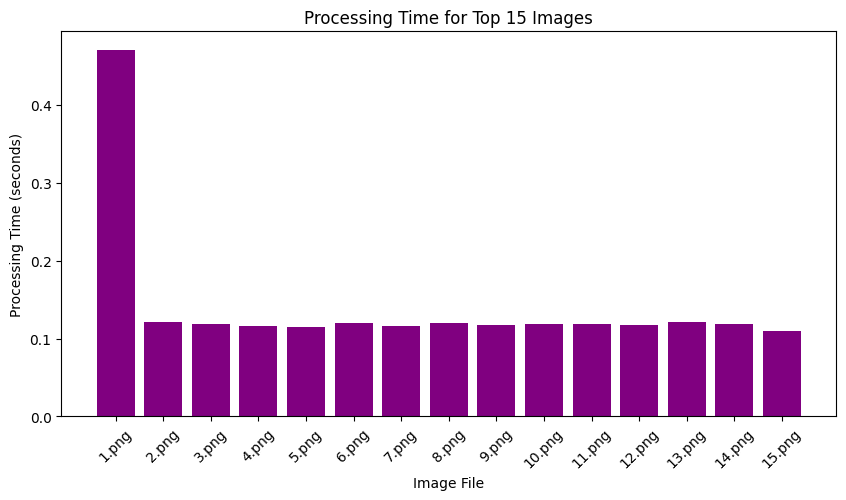

In [2]:
import os
import time
import cv2
import numpy as np
import pytesseract
import editdistance
import matplotlib.pyplot as plt

# Dataset paths
DATASET_PATH = "./OCR_Dataset/"
IMAGES_PATH = os.path.join(DATASET_PATH, "images")
TEXT_FILE_PATH = os.path.join(DATASET_PATH, "text.txt")

# Load ground truth texts
with open(TEXT_FILE_PATH, "r") as f:
    ground_truths = [line.strip() for line in f.readlines()]

# Get image file names in sorted order
image_files = sorted(os.listdir(IMAGES_PATH), key=lambda x: int(x.split(".")[0]))

# Lists to store results
wer_scores, cer_scores, levenshtein_scores, processing_times = [], [], [], []
true_labels, pred_labels, image_names = [], [], []

# 🔹 Function: Preprocess Image for OCR
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    processed_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]  # Apply thresholding
    return processed_img

# 🔹 Perform OCR & Evaluate
for idx, image_file in enumerate(image_files):
    img_path = os.path.join(IMAGES_PATH, image_file)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Skipping unreadable image: {img_path}")
        continue

    start_time = time.time()  # Start time

    processed_img = preprocess_image(img)
    ocr_text = pytesseract.image_to_string(processed_img, config="--psm 6").strip()

    end_time = time.time()  # End time
    processing_time = end_time - start_time

    gt_text = ground_truths[idx]  # Ground Truth

    # Calculate Metrics
    wer = editdistance.eval(ocr_text.split(), gt_text.split()) / max(1, len(gt_text.split()))
    cer = editdistance.eval(ocr_text, gt_text) / max(1, len(gt_text))
    lev_dist = editdistance.eval(ocr_text, gt_text)

    # Store results
    wer_scores.append(wer)
    cer_scores.append(cer)
    levenshtein_scores.append(lev_dist)
    processing_times.append(processing_time)
    
    true_labels.append(gt_text)
    pred_labels.append(ocr_text)
    image_names.append(image_file)

    # Debugging: Show sample OCR results
    if idx < 5:
        print(f"🔹 Image: {image_file} | OCR: {ocr_text} | GT: {gt_text}")

# 🔹 Compute Final Metrics
average_wer = np.mean(wer_scores)
average_cer = np.mean(cer_scores)
average_lev = np.mean(levenshtein_scores)
average_time = np.mean(processing_times)

print("\n🔹 Final Performance Metrics:")
print(f"✅ Average WER: {average_wer:.4f}")
print(f"✅ Average CER: {average_cer:.4f}")
print(f"✅ Average Levenshtein Distance: {average_lev:.4f}")
print(f"✅ Average Processing Time: {average_time:.4f} sec")

# 🔹 Generate Performance Graphs
plt.figure(figsize=(8, 5))
metrics = ["WER", "CER", "Levenshtein Distance"]
scores = [average_wer, average_cer, average_lev]
plt.bar(metrics, scores, color=["blue", "orange", "green"])
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Tesseract OCR Performance on Custom Dataset")
plt.ylim(0, 1.5)
plt.show()

# 🔹 Error in Top 15 Images
top_15_images = image_names[:15]
top_15_errors = levenshtein_scores[:15]

plt.figure(figsize=(10, 5))
plt.bar(top_15_images, top_15_errors, color="red")
plt.xlabel("Image File")
plt.ylabel("Levenshtein Distance (Error)")
plt.xticks(rotation=45)
plt.title("OCR Errors in Top 15 Images")
plt.show()

# 🔹 Processing Time for Top 15 Images
top_15_times = processing_times[:15]

plt.figure(figsize=(10, 5))
plt.bar(top_15_images, top_15_times, color="purple")
plt.xlabel("Image File")
plt.ylabel("Processing Time (seconds)")
plt.xticks(rotation=45)
plt.title("Processing Time for Top 15 Images")
plt.show()
